In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report
)
import statsmodels.api as sm


In [2]:
data = pd.read_csv("disease_dataset.csv")
data.head()

,Disease,Age,Gender,Smoker status
0,not diseased,52,Male,Smoker
1,not diseased,42,Male,Non-smoker
2,not diseased,54,Male,Non-smoker
3,not diseased,67,Male,Non-smoker
4,not diseased,41,Female,Smoker


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Disease        10000 non-null  object
 1   Age            10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   Smoker status  10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [4]:
data.isnull().sum()

Disease          0
Age              0
Gender           0
Smoker status    0
dtype: int64

In [5]:
data.tail()

,Disease,Age,Gender,Smoker status
9995,not diseased,64,Female,Non-smoker
9996,not diseased,15,Female,Non-smoker
9997,diseased,34,Male,Non-smoker
9998,not diseased,52,Female,Non-smoker
9999,diseased,54,Female,Non-smoker


In [6]:
data['Disease'] = data['Disease'].map({'not diseased' : 0, 'diseased':1})
data['Gender'] = data['Gender'].map({'Male' : 1, 'Female':0})
data['Smoker status'] = data['Smoker status'].map({'Non-smoker':0, 'Smoker':1})

data.head()

,Disease,Age,Gender,Smoker status
0,0,52,1,1
1,0,42,1,0
2,0,54,1,0
3,0,67,1,0
4,0,41,0,1


In [7]:
features_col = ['Age', 'Gender', 'Smoker status']

x = data[features_col]
y = data.Disease

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)
### dislay the shape of above
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(6700, 3)

(6700,)

(3300, 3)

(3300,)

In [9]:
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled["Age"] = scaler.fit_transform(x_train[["Age"]])
x_test_scaled["Age"] = scaler.transform(x_test[["Age"]])

🔹 3. Why do we need this?

Logistic regression gives a probability score (between 0 and 1).

By default, predict() will convert it into a label (0 or 1) using threshold 0.5.

Example:

y_pred = model.predict(X_test_scaled)


= [0, 1, 1]

But if you want risk scores (like “this person has a 65% chance of disease”), you need predict_proba.

In [12]:
model = LogisticRegression(solver='lbfgs', max_iter= 1000)
model.fit(x_train_scaled, y_train)
# for predicting the chance of getting disease 


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
# Step 1: get probabilities
y_prob = model.predict_proba(x_test_scaled)[:, 1]

# Step 2: convert probabilities to binary predictions
y_pred = (y_prob >= 0.5).astype(int)

# Step 3: evaluate
print("\n=== Evaluation metrics on test set ===")
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))
print("roc_auc:", roc_auc_score(y_test, y_prob))

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))



=== Evaluation metrics on test set ===
accuracy: 0.7672727272727272
precision: 0.5689655172413793
recall: 0.04252577319587629
f1: 0.07913669064748201
roc_auc: 0.6668344715473721

Confusion matrix:
 [[2499   25]
 [ 743   33]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.87      2524
           1       0.57      0.04      0.08       776

    accuracy                           0.77      3300
   macro avg       0.67      0.52      0.47      3300
weighted avg       0.72      0.77      0.68      3300



<Axes: xlabel='Predicted', ylabel='Actual'>

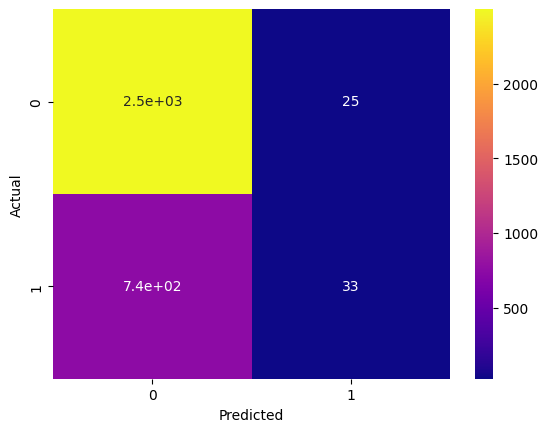

In [15]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])


sns.heatmap(conf_mat, annot=True, cmap='plasma')


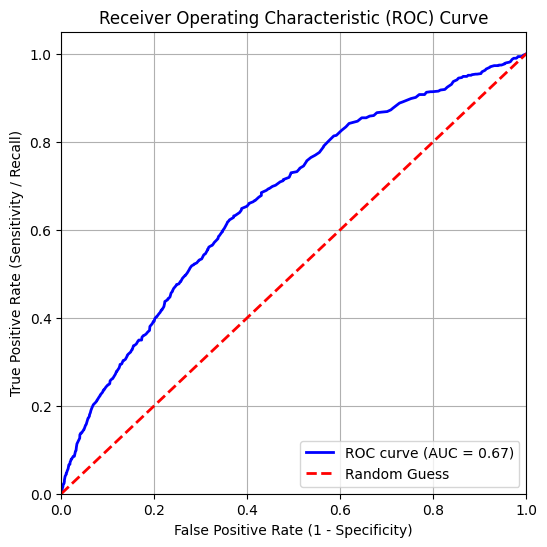

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Get false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 2. Compute Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# 3. Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--", label="Random Guess")

# 4. Format the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity / Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


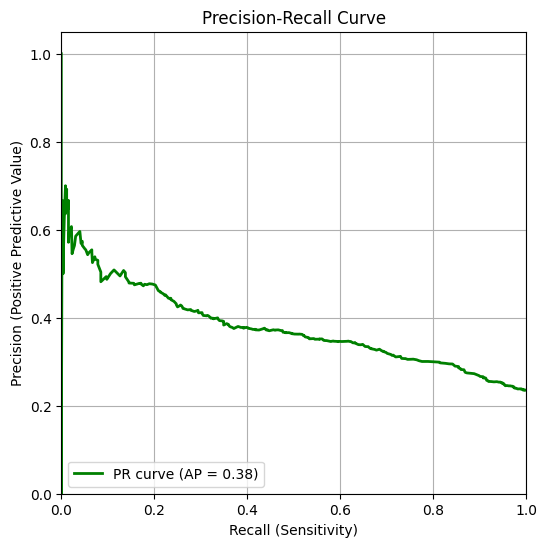

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# 2. Compute Average Precision (AP)
ap = average_precision_score(y_test, y_prob)

# 3. Plot Precision-Recall curve
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color="green", lw=2, label=f"PR curve (AP = {ap:.2f})")

# 4. Format the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Recall (Sensitivity)")
plt.ylabel("Precision (Positive Predictive Value)")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()
